In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Đọc dữ liệu
file_path = "data/10kmau2020.csv" 
df = pd.read_csv(file_path)

# Hiển thị thông tin cơ bản
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9386 entries, 0 to 9385
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ttnt             9386 non-null   int64  
 1   dantoc           9386 non-null   int64  
 2   tsnguoi          9386 non-null   int64  
 3   thunhap          9386 non-null   float64
 4   chitieu          9386 non-null   float64
 5   chichonangluong  9386 non-null   int64  
 6   chitiendien      9386 non-null   int64  
 7   dienticho        9386 non-null   int64  
 8   chatluongnhao    9386 non-null   int64  
 9   tiepcandienluoi  9386 non-null   int64  
 10  chitiendienbq    9386 non-null   float64
 11  thunhapbq        9386 non-null   float64
 12  chinangluongbq   9386 non-null   float64
 13  chitieubq        9386 non-null   float64
dtypes: float64(6), int64(8)
memory usage: 1.0 MB


,ttnt,dantoc,tsnguoi,thunhap,chitieu,chichonangluong,chitiendien,dienticho,chatluongnhao,tiepcandienluoi,chitiendienbq,thunhapbq,chinangluongbq,chitieubq
0,0,1,8,79412.0,5118.0,3470,350,65,1,1,43.75,9926.50,433.75,639.75
1,0,1,4,54255.0,4880.0,1972,324,60,1,1,81.00,13563.75,493.00,1220.00
2,0,1,4,48698.0,4744.0,1940,300,65,1,1,75.00,12174.50,485.00,1186.00
3,0,1,5,24421.0,14324.0,5325,1500,60,1,1,300.00,4884.20,1065.00,2864.80
4,0,1,4,21084.0,7024.0,2316,720,120,1,1,180.00,5271.00,579.00,1756.00


In [3]:
# Chọn các biến quan trọng để phân cụm
features = ['chichonangluong', 'chitiendien', 'tiepcandienluoi', 'chitiendienbq', 
            'chinangluongbq', 'thunhap', 'thunhapbq', 'tsnguoi', 'ttnt', 'dantoc', 'dienticho']

# Áp dụng Min-Max Scaling để chuẩn hóa dữ liệu
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Hiển thị dữ liệu đã chuẩn hóa
df_scaled.head()

,chichonangluong,chitiendien,tiepcandienluoi,chitiendienbq,chinangluongbq,thunhap,thunhapbq,tsnguoi,ttnt,dantoc,dienticho
0,0.014416,0.004667,1.0,0.002188,0.007208,0.002380,0.001190,0.538462,0.0,1.0,0.072482
1,0.008193,0.004320,1.0,0.004050,0.008193,0.001626,0.001626,0.230769,0.0,1.0,0.066339
2,0.008060,0.004000,1.0,0.003750,0.008060,0.001460,0.001460,0.230769,0.0,1.0,0.072482
3,0.022123,0.020000,1.0,0.015000,0.017698,0.000732,0.000586,0.307692,0.0,1.0,0.066339
4,0.009622,0.009600,1.0,0.009000,0.009622,0.000632,0.000632,0.230769,0.0,1.0,0.140049


In [4]:
pca = PCA(n_components=0.95)  
df_pca = pca.fit_transform(df_scaled)

num_components = df_pca.shape[1]
print(f"Số thành phần PCA giữ lại: {num_components}")

Số thành phần PCA giữ lại: 3


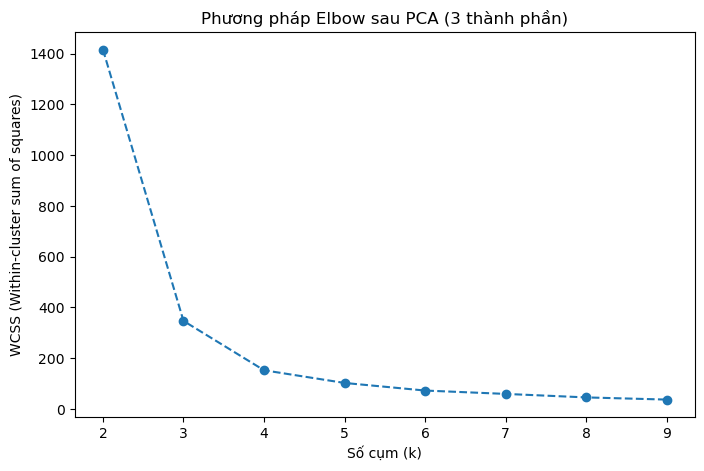

In [5]:
wcss_pca = []
K_range = range(2, 10)

for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_pca.fit(df_pca)
    wcss_pca.append(kmeans_pca.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss_pca, marker='o', linestyle='--')
plt.xlabel("Số cụm (k)")
plt.ylabel("WCSS (Within-cluster sum of squares)")
plt.title(f"Phương pháp Elbow sau PCA ({num_components} thành phần)")
plt.show()

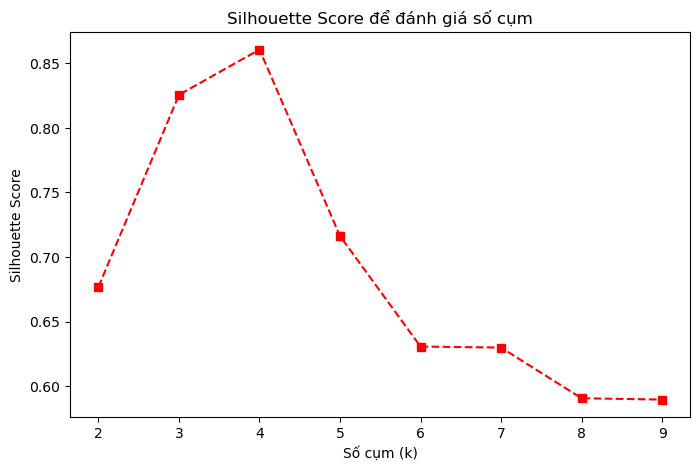

In [6]:
silhouette_scores = []
for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_pca = kmeans_pca.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, labels_pca))

# Vẽ biểu đồ Silhouette Score để đánh giá số cụm
plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel("Số cụm (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score để đánh giá số cụm")
plt.show()

In [7]:
# Chọn số cụm tối ưu từ Elbow Method và Silhouette Score
optimal_k_pca = 4
kmeans_final = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)
df_scaled["Cluster_PCA"] = kmeans_final.fit_predict(df_pca)

# Thống kê số lượng hộ gia đình trong từng cụm
print("Số lượng hộ gia đình trong từng cụm:")
print(df_scaled["Cluster_PCA"].value_counts())

Số lượng hộ gia đình trong từng cụm:
Cluster_PCA
1    4981
2    2853
0    1325
3     227
Name: count, dtype: int64


In [8]:
# Ghép lại với dữ liệu gốc để phân tích
df['Cluster_PCA'] = df_scaled["Cluster_PCA"]

# Trung bình các biến trong từng cụm
cluster_summary = df.groupby("Cluster_PCA")[features].mean()
print("Trung bình các biến theo từng cụm:")
print(cluster_summary)

Trung bình các biến theo từng cụm:
             chichonangluong  chitiendien  tiepcandienluoi  chitiendienbq  \
Cluster_PCA                                                                 
0                5901.778868  2000.394717         0.963774     562.120152   
1                8459.940574  4156.010239         0.997390    1243.749443   
2               12331.116719  6319.636873         0.998948    1870.200178   
3                9397.881057  4181.925110         1.000000    1183.381645   

             chinangluongbq        thunhap      thunhapbq   tsnguoi  ttnt  \
Cluster_PCA                                                                 
0               1458.680906   87835.975925   23226.211635  4.212075   0.0   
1               2386.739807  203608.534471   58336.172310  3.603694   0.0   
2               3500.445534  366883.288328  107869.934923  3.599369   1.0   
3               2479.447724  212966.136123   60629.227465  3.903084   1.0   

             dantoc   dienticho  
Clust

Số lượng hộ gia đình trong từng cụm:
Cluster_PCA
0    1325
1    4981
2    2853
3     227
Name: count, dtype: int64


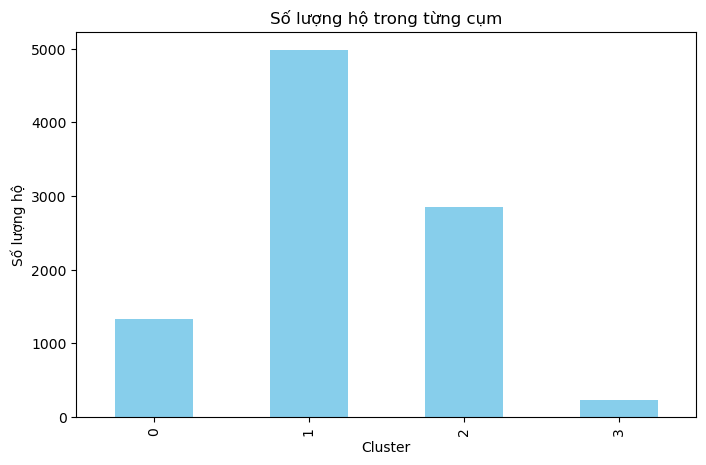

In [9]:
# Thống kê số lượng hộ gia đình trong từng cụm
cluster_counts = df['Cluster_PCA'].value_counts().sort_index()

print("Số lượng hộ gia đình trong từng cụm:")
print(cluster_counts)

# Vẽ biểu đồ số lượng hộ trong từng cụm
plt.figure(figsize=(8,5))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Cluster")
plt.ylabel("Số lượng hộ")
plt.title("Số lượng hộ trong từng cụm")
plt.show()

Đặc điểm kinh tế của từng cụm:
                   thunhap      thunhapbq       chitieu     chitieubq
Cluster_PCA                                                          
0             87835.975925   23226.211635  17552.767019   4969.945246
1            203608.534471   58336.172310  26062.070106   8674.084662
2            366883.288328  107869.934923  36714.754469  12379.727724
3            212966.136123   60629.227465  28643.206608   9472.177638


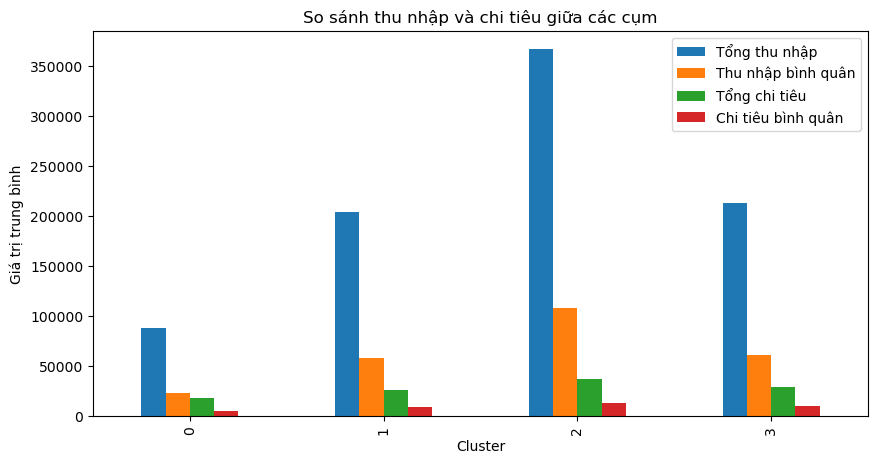

In [10]:
# Tính thu nhập và chi tiêu trung bình trong từng cụm
economic_summary = df.groupby("Cluster_PCA")[['thunhap', 'thunhapbq', 'chitieu', 'chitieubq']].mean()

print("Đặc điểm kinh tế của từng cụm:")
print(economic_summary)

# Vẽ biểu đồ so sánh thu nhập và chi tiêu trung bình giữa các cụm
economic_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Giá trị trung bình")
plt.title("So sánh thu nhập và chi tiêu giữa các cụm")
plt.legend(["Tổng thu nhập", "Thu nhập bình quân", "Tổng chi tiêu", "Chi tiêu bình quân"])
plt.show()

Mức tiêu thụ năng lượng trong từng cụm:
             chichonangluong  chinangluongbq  chitiendien  chitiendienbq
Cluster_PCA                                                             
0                5901.778868     1458.680906  2000.394717     562.120152
1                8459.940574     2386.739807  4156.010239    1243.749443
2               12331.116719     3500.445534  6319.636873    1870.200178
3                9397.881057     2479.447724  4181.925110    1183.381645


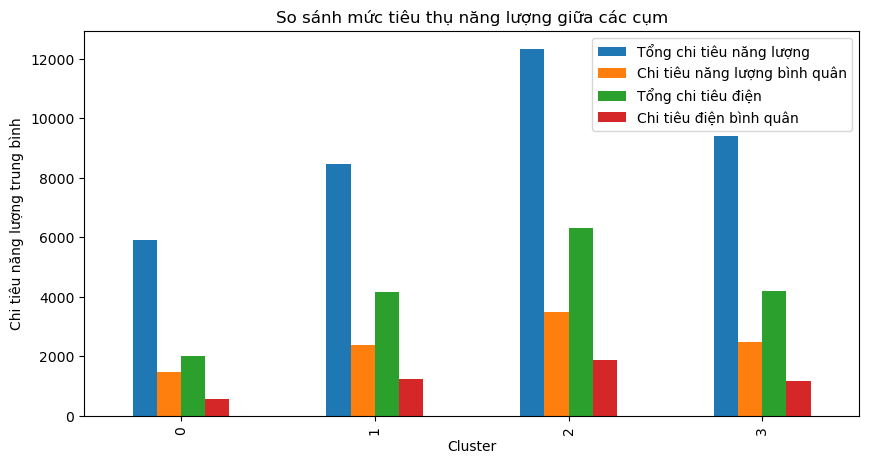

In [11]:
# Tính mức tiêu thụ năng lượng trung bình trong từng cụm
energy_summary = df.groupby("Cluster_PCA")[['chichonangluong', 'chinangluongbq', 'chitiendien', 'chitiendienbq']].mean()

print("Mức tiêu thụ năng lượng trong từng cụm:")
print(energy_summary)

# Vẽ biểu đồ so sánh tiêu thụ năng lượng giữa các cụm
energy_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Chi tiêu năng lượng trung bình")
plt.title("So sánh mức tiêu thụ năng lượng giữa các cụm")
plt.legend(["Tổng chi tiêu năng lượng", "Chi tiêu năng lượng bình quân", "Tổng chi tiêu điện", "Chi tiêu điện bình quân"])
plt.show()

Tỷ lệ hộ có tiếp cận điện lưới trong từng cụm (%):
Cluster_PCA
0     96.377358
1     99.739008
2     99.894848
3    100.000000
Name: tiepcandienluoi, dtype: float64


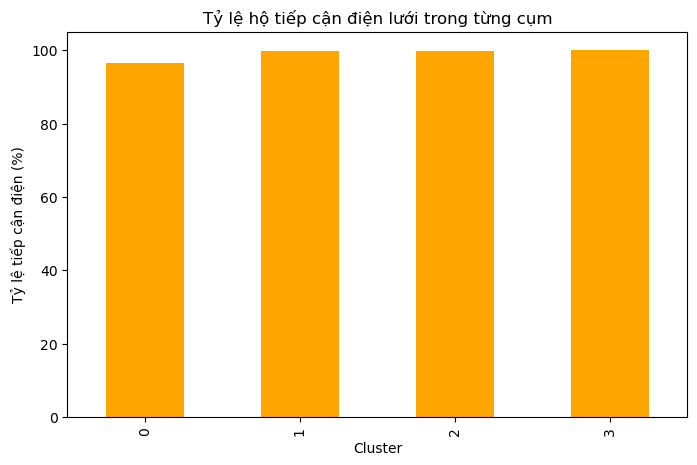

In [12]:
# Tính tỷ lệ hộ có tiếp cận điện lưới trong từng cụm
electricity_access = df.groupby("Cluster_PCA")["tiepcandienluoi"].mean() * 100

print("Tỷ lệ hộ có tiếp cận điện lưới trong từng cụm (%):")
print(electricity_access)

# Vẽ biểu đồ tỷ lệ tiếp cận điện lưới
plt.figure(figsize=(8,5))
electricity_access.plot(kind="bar", color="orange")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ tiếp cận điện (%)")
plt.title("Tỷ lệ hộ tiếp cận điện lưới trong từng cụm")
plt.show()

Tỷ lệ hộ dân tộc thiểu số trong từng cụm (%):
Cluster_PCA
0      0.0
1    100.0
2    100.0
3      0.0
Name: dantoc, dtype: float64

Tỷ lệ hộ nông thôn trong từng cụm (%):
Cluster_PCA
0    100.0
1    100.0
2      0.0
3      0.0
Name: ttnt, dtype: float64


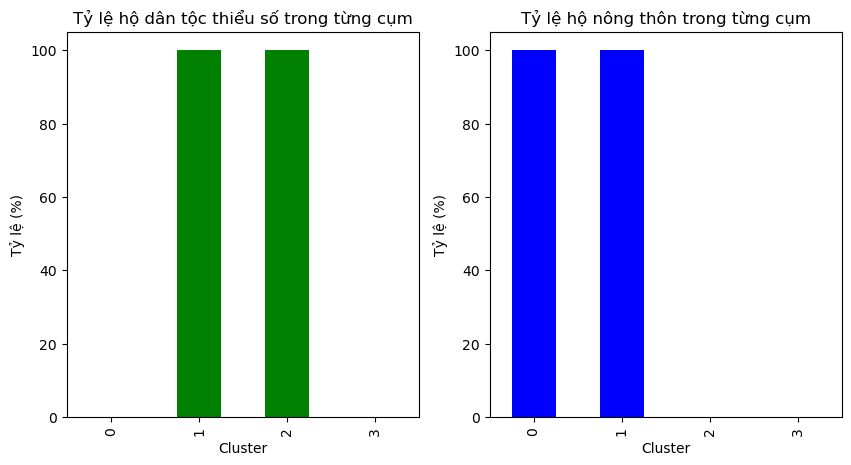

In [13]:
# Tính tỷ lệ hộ dân tộc thiểu số và hộ nông thôn trong từng cụm
ethnic_ratio = df.groupby("Cluster_PCA")["dantoc"].apply(lambda x: (x == 0).mean() * 100)
rural_ratio = df.groupby("Cluster_PCA")["ttnt"].apply(lambda x: (x == 0).mean() * 100)

print("Tỷ lệ hộ dân tộc thiểu số trong từng cụm (%):")
print(ethnic_ratio)

print("\nTỷ lệ hộ nông thôn trong từng cụm (%):")
print(rural_ratio)

# Vẽ biểu đồ
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
ethnic_ratio.plot(kind="bar", color="green")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ hộ dân tộc thiểu số trong từng cụm")

plt.subplot(1, 2, 2)
rural_ratio.plot(kind="bar", color="blue")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ hộ nông thôn trong từng cụm")

plt.show()

Đặc điểm hộ gia đình trong từng cụm:
              tsnguoi   dienticho
Cluster_PCA                      
0            4.212075   74.547925
1            3.603694   92.707689
2            3.599369  100.511041
3            3.903084   85.792952


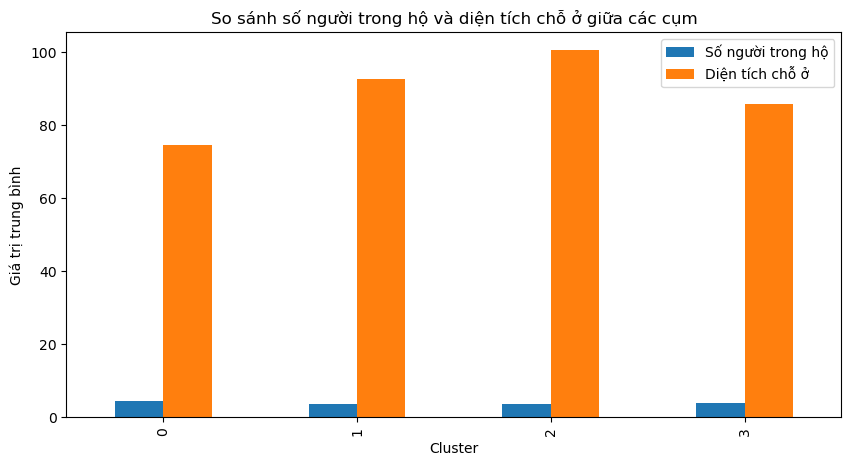

In [14]:
# Tính số người trung bình trong hộ và diện tích chỗ ở trong từng cụm
household_summary = df.groupby("Cluster_PCA")[['tsnguoi', 'dienticho']].mean()

print("Đặc điểm hộ gia đình trong từng cụm:")
print(household_summary)

# Vẽ biểu đồ so sánh đặc điểm hộ gia đình giữa các cụm
household_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Giá trị trung bình")
plt.title("So sánh số người trong hộ và diện tích chỗ ở giữa các cụm")
plt.legend(["Số người trong hộ", "Diện tích chỗ ở"])
plt.show()

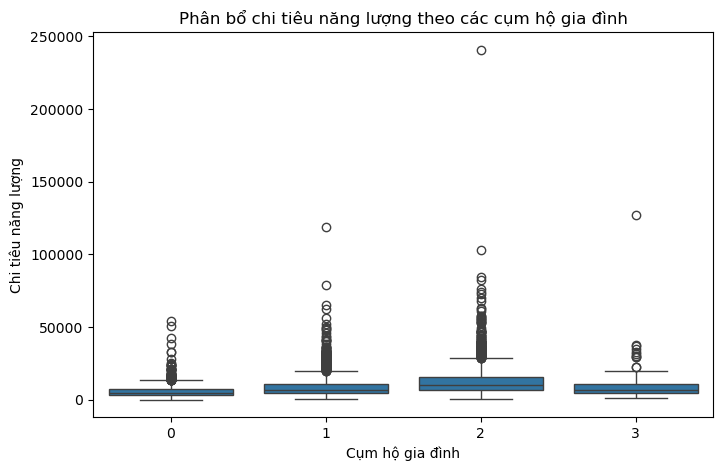

In [21]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Cluster_PCA', y='chichonangluong')
plt.title("Phân bổ chi tiêu năng lượng theo các cụm hộ gia đình")
plt.xlabel("Cụm hộ gia đình")
plt.ylabel("Chi tiêu năng lượng")
plt.show()